# Testing code for cost function "elasticity" on the annulus

In [1]:
%pylab inline

import dionysus

Populating the interactive namespace from numpy and matplotlib


## Constructing the annulus and combuting the cocycle

(-2.1372292833247655,
 2.158458382224263,
 -1.997206356161884,
 2.1196174427189227)

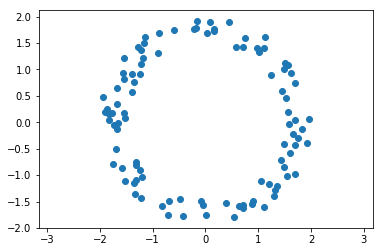

In [2]:
R = 1.5
d = .5
n = 100

# r in [0,1]
# th in [0,2pi)

from math import sin, cos, pi
from random import uniform
def rand_annulus_pt():
    r = uniform(0,1)
    th = uniform(0,2*pi)
    return (R+r*d) * cos(th), (R+r*d) * sin(th)
annulus = np.array([(rand_annulus_pt()) for x in range(100)])
plt.scatter(*annulus.T)
plt.axis('equal')

In [3]:
prime = 19
vr = dionysus.fill_rips(annulus, 2, 4.)
cp = dionysus.cohomology_persistence(vr, prime, True)
dgms = dionysus.init_diagrams(cp, vr)

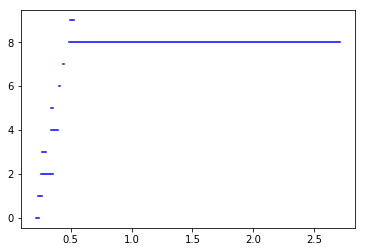

In [4]:
dionysus.plot.plot_bars(dgms[1], show=True)

In [5]:
bars = [bar for bar in dgms[1] if bar.death > 1.]
bars

[(0.486768,2.71376)]

In [6]:
cocycles = [cp.cocycle(bar.data) for bar in bars]
vr_8 = dionysus.Filtration([s for s in vr if s.data <= 1.0])
coords = [dionysus.smooth(vr_8, cocycle, prime) for cocycle in cocycles]

(-2.1372292833247655,
 2.158458382224263,
 -1.997206356161884,
 2.1196174427189227)

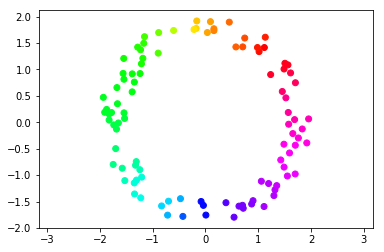

In [7]:
# subplot(121)#, projection="3d")
scatter(*annulus.T, c=coords[0], cmap="hsv")
plt.axis('equal')

# subplot(122)#, projection="3d")
# scatter(*annulus.T, c=coords[1], cmap="hsv")

## Running TensorFlow

In [8]:
import tensorflow as tf
# import coboundary_D2 as cbd

In [9]:
D = {}
data = {}
indexing = {}
ix = [0]*50
thr = 3
for s in vr:
    if s.dimension() == 0:
        continue
    elif s.data > thr:
        break
    D.setdefault(s.dimension(),[[],[]])
    data.setdefault(s.dimension(),[])
    indexing.setdefault(s.dimension(),{})
    indexing.setdefault(s.dimension()-1,{})
    if not s in indexing[s.dimension()]:
        indexing[s.dimension()][s] = ix[s.dimension()]
        ix[s.dimension()] += 1
    for dat, k in enumerate(s.boundary()): 
        if not k in indexing[s.dimension()-1]:
            indexing[s.dimension()-1][k] = ix[s.dimension()-1]
            ix[s.dimension()-1] += 1
        D[s.dimension()][0].append(indexing[s.dimension()][s]) #rows
        D[s.dimension()][1].append(indexing[s.dimension()-1][k]) #cols
        if dat%2:
            data[s.dimension()].append(-1)
        else:
            data[s.dimension()].append(1)
import scipy as sp
CBd = [sp.sparse.csr_matrix((data[d], (D[d][0], D[d][1]))).todense() for d in range(1,max(D.keys())+1)]

In [10]:
n, m = CBd[0].shape
l = array([1])

f = np.zeros((n,1))
for c2 in cocycles[0]:
    f[indexing[1][vr[c2.index]]] = c2.element
bdry = CBd[0]

In [ ]:
Z = tf.get_variable("Z", (m,1), dtype=tf.float32)
F = tf.placeholder(dtype=tf.float32, shape=(n,1))
B = tf.placeholder(dtype=tf.float32, shape=(n,m))
L = tf.placeholder(dtype=tf.float32, shape=(1,))

In [13]:
# cost = tf.reduce_sum(tf.square(F - B@Z)) + L*tf.reduce_sum(tf.abs(Z))
cost = tf.reduce_sum(tf.square(F - B@Z)) + L*tf.reduce_sum(tf.norm(B@Z,ord= 2))

In [14]:
optimizer = tf.train.AdamOptimizer(.01)
train = optimizer.minimize(cost)

In [15]:
init = tf.global_variables_initializer()

In [16]:
Zv = None
with tf.Session() as session:
    session.run(init)
    for i in range(10000):
        session.run(train, {F:f, B:bdry, L: l})
        if i%1000 == 0:
            print(session.run(cost, {F:f, B:bdry, L: l}))
    Zv = session.run(Z)
Zv

[58740.332]
[36302.363]
[36290.742]
[36290.746]
[36290.742]
[36290.746]
[36290.742]
[36290.742]
[36290.742]
[36290.758]


array([[ 4.0378594 ],
       [ 1.4568532 ],
       [ 2.4363444 ],
       [ 1.3622595 ],
       [ 0.31923312],
       [ 0.29124862],
       [-1.4969065 ],
       [-1.4231932 ],
       [-1.8485222 ],
       [-4.806936  ],
       [ 0.31923354],
       [ 0.25290373],
       [-0.4171639 ],
       [-0.4171641 ],
       [-1.418912  ],
       [-1.2728943 ],
       [-1.2728857 ],
       [-0.24157993],
       [-0.2182777 ],
       [ 0.52198213],
       [ 0.56116545],
       [ 5.6664934 ],
       [ 3.3814807 ],
       [-1.0954218 ],
       [-1.0847113 ],
       [-1.4836254 ],
       [-1.8264526 ],
       [ 0.26399082],
       [ 0.18113334],
       [ 0.13869278],
       [ 0.2954999 ],
       [ 0.26838344],
       [ 0.38591754],
       [ 0.70510393],
       [-5.489705  ],
       [-1.415589  ],
       [ 0.58214176],
       [ 0.58214164],
       [-0.52676815],
       [ 0.17231153],
       [-0.45172945],
       [ 0.27147907],
       [ 0.2592602 ],
       [ 5.256541  ],
       [ 3.3505366 ],
       [ 0